# Módulo 5 - Técnicas de Programação II | Python

## Projeto Final - História das Olimpíadas

Este projeto consiste em uma análise de dados históricos dos jogos olímpicos.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

## Metadados:

O arquivo ```athlete_events.csv``` contém 271116 linhas e 15 colunas. Cada linha corresponde a um indivíduo (atleta) que competiu em um evento olímpico individual. Veja a descrição das 15 colunas, a seguir:

- **ID:** Valor único para cada atleta
- **Name:** Nome do atleta
- **Sex:** Gênero do atleta (M para masculino e F para feminino)
- **Age:** Idade do atleta no momento da competição
- **Height:** Altura do atleta, em centímetros
- **Weight:** Peso do atleta, em kg
- **Team:** Nome do time
- **NOC:** National Olympic Committee (código de 3 letras)
- **Games:** Ano e temporada dos jogos
- **Year:** Ano dos jogos
- **Season:** Temporada dos jogos (summer para verão e winter para inverno)
- **City:** Cidade em que ocorreu os jogos
- **Sport:** Esporte praticado pelo atleta
- **Event:** Categoria/modalidade da competição
- **Medal:** Medalha adquirida: Gold (ouro), Silver (prata), Bronze ou NA

## O Brasil nas olímpiadas

<font size=+3>**1.** Crie um DataFrame contendo apenas informações sobre atletas **brasileiros**. Exiba a quantidade de linhas desse novo DataFrame.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('data/athlete_events.csv')
br = df[df['Team'] == 'Brazil'].copy()

In [46]:
br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 665 to 270789
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3772 non-null   int64  
 1   Name    3772 non-null   object 
 2   Sex     3772 non-null   object 
 3   Age     3713 non-null   float64
 4   Height  3304 non-null   float64
 5   Weight  3133 non-null   float64
 6   Team    3772 non-null   object 
 7   NOC     3772 non-null   object 
 8   Games   3772 non-null   object 
 9   Year    3772 non-null   int64  
 10  Season  3772 non-null   object 
 11  City    3772 non-null   object 
 12  Sport   3772 non-null   object 
 13  Event   3772 non-null   object 
 14  Medal   449 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 471.5+ KB


In [47]:
br.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


<font size=+3>**2. Será que existe alguma correlação entre a altura do atleta e seu desempenho, para algum esporte? Faça essa análise separadamente para cada gênero, e conclua.**</font>

Gere um ou mais gráficos de sua escolha, em que seja possível comparar as alturas dos atletas de cada esporte, separando-os por gênero. Se necessário, crie colunas ou DataFrames auxiliares.

**Facilitador:** se quiser, analise apenas os esportes em que se tenha ao menos 5 atletas medalhistas e 5 atletas não medalhistas, para facilitar visualizações e conclusões.

Para se fazer a análise de desempenho decidiu-se dividir a variável medalhas apenas em "medalhistas" e "não-medalhistas", visto que o enunciado foca apenas em "desempenho" e não solicita uma estratificação entre ouro, prata e bronze. Considerou-se então "desempenho bom" o atleta ter recebido melhas, independente do seu valor.

JUSTIFICATIVA ABAIXO, AVALIAR
*** Mesmo porquê, considerar uma diferença entre ouro, prata e bronze, além de deixar a análise mais complexa, pois a correlação ficaria muito nebulosa se por exemplo o valor da altura para medalhas de prata fosse maior que o de ouro e de bronze ao mesmo tempo, mas por exemplo, menor do que para não-medalhistas.

In [48]:
br['Medal'].fillna('NO_MEDALS', inplace=True)
br_bin = br.copy()
br_bin.replace({'Bronze': 'MEDALS',
                'Silver': 'MEDALS',
                'Gold': 'MEDALS'}, inplace=True)
br_bin['Medal'].value_counts()

NO_MEDALS    3323
MEDALS        449
Name: Medal, dtype: int64

In [49]:
br_f = br_bin[br_bin['Sex'] == 'F']
br_f

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NO_MEDALS
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,MEDALS
1669,925,Adenzia Aparecida Ferreira da Silva,F,29.0,187.0,65.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NO_MEDALS
1855,1020,Adriana Aparecida dos Santos,F,21.0,180.0,61.0,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NO_MEDALS
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,MEDALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267755,133947,Danielle Zangrando,F,16.0,162.0,57.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Lightweight,NO_MEDALS
267756,133947,Danielle Zangrando,F,25.0,162.0,57.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Judo,Judo Women's Lightweight,NO_MEDALS
268651,134399,"Maria Jos ""Zez"" Batista de Sales",F,31.0,172.0,73.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Handball,Handball Women's Handball,NO_MEDALS
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NO_MEDALS


In [50]:
br_f.drop_duplicates(subset=['Year', 'Event'], keep='first').groupby(by=['Sport','Medal'],
             as_index=False).count().sort_values(['Medal','Event'], 
                                                 ascending=False).drop(columns=['ID','Name','Sex','Age','Height','Weight',
                         'Team','NOC','Games','Year','Season','City'])

,Sport,Medal,Event
2,Athletics,NO_MEDALS,100
34,Swimming,NO_MEDALS,77
21,Gymnastics,NO_MEDALS,47
24,Judo,NO_MEDALS,37
31,Sailing,NO_MEDALS,18
13,Diving,NO_MEDALS,15
12,Cycling,NO_MEDALS,12
14,Equestrianism,NO_MEDALS,12
35,Synchronized Swimming,NO_MEDALS,12
36,Table Tennis,NO_MEDALS,12


In [51]:
br_f_5 = br_f[(br_f['Sport'] == 'Judo') |
              (br_f['Sport'] == 'Sailing') |
              (br_f['Sport'] == 'Football') |
              (br_f['Sport'] == 'Basketball') |
              (br_f['Sport'] == 'Volleyball')]
br_f_5['Sport'].value_counts()

Volleyball    120
Football      102
Basketball     82
Judo           42
Sailing        28
Name: Sport, dtype: int64

Abaixo temos um boxplot para as categorias femininas de 5 esportes (selecionados de acordo com a dica da professora). Nota-se que, para as mulheres a altura não aparenta ser uma variável correlacionada ao desempenho. Isso pode estar associado a vários fatores, como a maior quantidade de esportes de grupo estarem entre os 5, deixando mais indefinida a importancia da altura da atleta nas vitórias obtidas.

In [53]:
fig = px.box(x='Sport',
             y='Height',
             data_frame=br_f_5,
             color='Medal',
             title='Performance x Height (F)',
            color_discrete_sequence=['Orange','Lightgrey'])

fig.update_yaxes(title='Height')
fig.update_xaxes(title='Medals')

fig.update_layout(legend=dict(title='Performance'))

fig.show()

### Correlação entre Altura e Desempenho para os 5 Esportes Acima

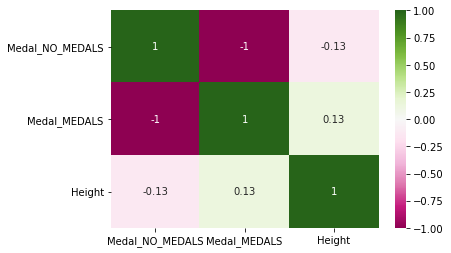

In [55]:
br_dummied_f = pd.get_dummies(br_f_5[['Height','Medal']])

sns.heatmap(br_dummied_f[['Medal_NO_MEDALS','Medal_MEDALS','Height']]
            .corr('spearman'), annot=True, cmap="PiYG");

### MASCULINO

In [56]:
br_m = br_bin[br_bin['Sex'] == 'M']

br_m.drop_duplicates(subset=['Year', 'Event'], keep='first').groupby(by=['Sport','Medal'],
             as_index=False).count().sort_values(['Medal','Event'], 
                                                 ascending=False).drop(columns=['ID','Name','Sex','Age','Height','Weight',
                         'Team','NOC','Games','Year','Season','City'])

,Sport,Medal,Event
4,Athletics,NO_MEDALS,192
36,Swimming,NO_MEDALS,183
10,Boxing,NO_MEDALS,71
32,Sailing,NO_MEDALS,62
26,Judo,NO_MEDALS,61
34,Shooting,NO_MEDALS,59
22,Gymnastics,NO_MEDALS,51
17,Equestrianism,NO_MEDALS,49
29,Rowing,NO_MEDALS,42
14,Cycling,NO_MEDALS,41


In [57]:
br_m_5 = br_m[(br_m['Sport'] == 'Judo') |
              (br_m['Sport'] == 'Sailing') |
              (br_m['Sport'] == 'Athletics') |
              (br_m['Sport'] == 'Swimming') |
              (br_m['Sport'] == 'Volleyball')]

br_m_5['Sport'].value_counts()

Swimming      387
Athletics     363
Volleyball    165
Sailing       133
Judo           78
Name: Sport, dtype: int64

## DROP DUPLICATES

Já para o conjunto de 5 esportes masculinhos uma possível correlação da altura com o desempenho começa a ficar mais evidente, pois tanto a mediana como a caixa da distribuição das alturas tem um posicionamento mais acima no gráfico quando se olham os vermelhos, os medalhistas. Como possível explicação temos o fato de que 4 dos esportes são individuais, e o único em grupo (volleyball) tem como benefício uma altura maior, tendo em vista a altura da rede e a necessidade da rotatividade na quadra. Quanto aos individuais, principalmente natação e atletismo, nota-se que a envergadura grande também pode ser um fator determimante na obtenção de medalhas.

In [58]:
fig = px.box(x='Sport', y='Height', data_frame=br_m_5,
             color='Medal', title='Performance x Height (M)')

fig.update_yaxes(title='Height')
fig.update_xaxes(title='Medals')

fig.update_layout(legend=dict(title='Performance'))

fig.show()

### Correlação entre Altura e Desempenho para os 5 Esportes Acima

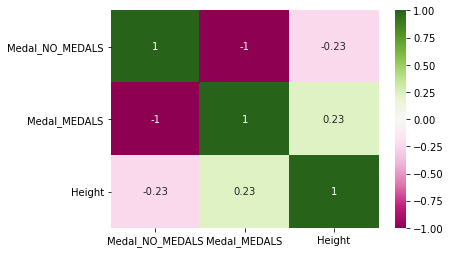

In [59]:
br_dummied_m = pd.get_dummies(br_m_5[['Height','Medal']])
sns.heatmap(br_dummied_m[['Medal_NO_MEDALS','Medal_MEDALS','Height']].corr('spearman'), annot=True, cmap="PiYG");

CONCLUSÃO

A altura parece ter uma leve correlação com o desempenho apenas nas categorias masculinas, nos 5 esportes analisados.

<font size=+3>**3. Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.**</font>

Crie uma visualização de sua preferência para mostrar, por esporte, a proporção de medalhas de ouro, prata e bronze que nosso país já consquistou.

**Facilitador:** Se preferir, mostre as proporções apenas para os 6 esportes que tiveram mais medalhas.  

*DICA:* Cuidado! Esportes em equipe dão medalhas a todos os jogadores, mas só contabilizam uma vez!

In [60]:
df_2 = pd.read_csv('data/athlete_events.csv')

br_2 = df_2[df_2['Team'] == 'Brazil']

br_bin_2 = br_2.copy()

br_bin_2.replace({'Bronze': 'MEDALS',
                'Silver': 'MEDALS',
                'Gold': 'MEDALS'}, inplace=True)

br_bin_2.sort_values('Year', inplace=True)

br_bin_2.dropna(subset=['Medal'], inplace=True)

br_bin_2.drop_duplicates(subset=['Year', 'Event'], keep='first', inplace=True)

br_bin_2_group = br_bin_2.groupby(
    by=['Sport','Medal'], as_index=False).count().sort_values(
    ['Event'], ascending=False)

br_bin_2_group.drop(
    columns=['ID','Name','Sex','Age','Height','Weight','Team',
             'NOC','Games','Year','Season','City'], inplace=True)

br_mean_medal = br_2.sort_values('Year')
br_mean_medal_1 = br_mean_medal.drop_duplicates(subset=['Year', 'Event'], keep='first')

br_bin_2_group

,Sport,Medal,Event
7,Judo,MEDALS,22
9,Sailing,MEDALS,18
0,Athletics,MEDALS,16
11,Swimming,MEDALS,14
13,Volleyball,MEDALS,10
5,Football,MEDALS,8
1,Basketball,MEDALS,5
2,Boxing,MEDALS,5
10,Shooting,MEDALS,4
3,Canoeing,MEDALS,3


In [61]:
br_6 = br_mean_medal_1[(br_mean_medal_1['Sport'] == 'Judo') |
                       (br_mean_medal_1['Sport'] == 'Sailing') |
                       (br_mean_medal_1['Sport'] == 'Athletics') |
                       (br_mean_medal_1['Sport'] == 'Swimming') |
                       (br_mean_medal_1['Sport'] == 'Volleyball') |
                       (br_mean_medal_1['Sport'] == 'Football')]
br_6

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
121234,61291,Adolphe Christiano Klingelhoeffer,M,20.0,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 110 metres Hurdles,NaN
121232,61291,Adolphe Christiano Klingelhoeffer,M,20.0,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 60 metres,NaN
121233,61291,Adolphe Christiano Klingelhoeffer,M,20.0,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 200 metres,NaN
6045,3399,Orlando Amndola,M,NaN,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 100 metres Freestyle,NaN
267759,133948,Octvio Zani,M,22.0,NaN,NaN,Brazil,BRA,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Hammer Throw,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51584,26512,Jlio Csar Miranda de Oliveira,M,30.0,185.0,95.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Javelin Throw,NaN
219943,110488,Altobeli Santos da Silva,M,25.0,181.0,60.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
219942,110487,Alex William Pombo Silva,M,28.0,174.0,73.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Lightweight,NaN
5714,3221,Higor Silva Alves,M,22.0,183.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,NaN


In [62]:
br_6_group = br_6.groupby(by = ['Sport','Medal'], as_index=False).count()

In [63]:
br_bin_2.sort_values('Medal', ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
47792,24637,Afrnio Antnio da Costa,M,28.0,178.0,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",MEDALS
4562,2592,"Alexandre ""Alexandre Pato"" Rodrigues da Silva",M,22.0,179.0,71.0,Brazil,BRA,2012 Summer,2012,Summer,London,Football,Football Men's Football,MEDALS
199960,100429,"Ricardo ""Ricardinho"" Bermudez Garcia",M,36.0,191.0,90.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,MEDALS
194869,97805,Ketleyn Lima Quadros,F,20.0,164.0,57.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Lightweight,MEDALS
86229,43708,Leandro Marques Guilheiro,M,24.0,176.0,81.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Lightweight,MEDALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47989,24731,Rbson Caetano da Silva,M,24.0,187.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 200 metres,MEDALS
158468,79547,Aurlio Fernndez Miguel,M,24.0,180.0,95.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Judo,Judo Men's Half-Heavyweight,MEDALS
83120,42226,Lars Schmidt Grael,M,24.0,185.0,80.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Multihull,MEDALS
66171,33849,Nelson Falco,M,42.0,180.0,75.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Two Person Keelboat,MEDALS


In [64]:
br_6_group

,Sport,Medal,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event
0,Athletics,Bronze,6,6,6,6,6,6,6,6,6,6,6,6,6
1,Athletics,Gold,4,4,4,4,4,4,4,4,4,4,4,4,4
2,Athletics,Silver,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Football,Bronze,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Football,Gold,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Football,Silver,5,5,5,5,5,5,5,5,5,5,5,5,5
6,Judo,Bronze,15,15,15,15,15,15,15,15,15,15,15,15,15
7,Judo,Gold,4,4,4,4,3,3,4,4,4,4,4,4,4
8,Judo,Silver,3,3,3,3,3,3,3,3,3,3,3,3,3
9,Sailing,Bronze,8,8,8,8,8,8,8,8,8,8,8,8,8


In [65]:
br_6_group.drop(columns=['ID','Name','Sex','Age','Height','Weight',
                         'Team','NOC','Games','Year','Season','City'], inplace=True)

In [66]:
br_6_group

,Sport,Medal,Event
0,Athletics,Bronze,6
1,Athletics,Gold,4
2,Athletics,Silver,2
3,Football,Bronze,2
4,Football,Gold,1
5,Football,Silver,5
6,Judo,Bronze,15
7,Judo,Gold,4
8,Judo,Silver,3
9,Sailing,Bronze,8


In [67]:
fig = px.histogram(x='Sport', y="Event", data_frame=br_6_group, color='Medal',
                   category_orders={'Medal': ['Bronze','Silver','Gold']},
                   color_discrete_sequence=['darkorange','silver','gold'], opacity=0.7,
                   barnorm='percent', text_auto=True, title = 'Ratio of Medals x Sport')
fig.update_layout(annotations=[{
    'text':'Totals:                                13                                              8                                              22                                            18                                        9                                        10',
    'xref':'x',    
    'yref':'y', 
    'x':2, 
    'y':115,
    'showarrow':False,
    'ax': 0,
    'ay': -80,
    'font':dict(
            family="Nunito",
            size=16,
            color="#e67e22"
            )
}])

fig.update_xaxes(title='Sports')
fig.update_yaxes(title='Medals in %')

GRÁFICO DE BARRAS EMPILHADAS (NORMALIZADAS)

Este gráfico foi escolhido, em detrimento dos de pizza, pela facilidade da visualização de todos os 6 esportes com mais medalhas em uma mesma plotagem. Como se pode observar, a proporção é visível tanto nas cores escolhidas para cada tipo de medalha como no valor exibido no topo de cada barra.

Com esse gráfico é possível observar que, ao longo deste século contemplado no Data Frame, o esporte em equipel Volleyball é o que nos trouxe a maior proporção de medalhas de ouro e que o futebol (que é considerado o esporte nacional) ironicamente nos traz a menor proporção destas.

AVALIAR:
Outras observações também podem ser feitas comparando-se as proporções de medalhas, sendo este um gráfico de leitura fácil, que nos permite colocar em uma tela todas as informações na "mesma pauta", diferente de um conjunto de gráficos de pizza que nos forçaria a colocar, talvez, dois conjuntos de 3 e prejudicar um pouco a visualização e leitura, por dar a impressão que são 6 gráificos em vez de um só, a possível necessidade de uma edição adicional para que apenas um título aparecesse, em vez de 6, assim como os labels de cores.

<font size=+3>4. Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras.</font>

Crie um gráfico de sua escolha, que mostre o total de medalhas de ouro, prata e bronze, por edição da olimpíada (em ordem cronológica).

DICA: Mais uma vez, tome cuidado com os esportes em grupo - os contabilize apenas uma vez!

In [68]:
df = pd.read_csv('data/athlete_events.csv')
br4 = df[df['Team'] == 'Brazil'].copy()
br4.dropna(subset=['Medal'], inplace=True)
br_uniq = br4.drop_duplicates(subset=['Year', 'Event'], keep='first').copy()
br_uniq.sort_values(by='Year').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
181713,91332,Guilherme Paraense,M,35.0,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold
14409,7767,Dario Barbosa,M,37.0,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
47792,24637,Afrnio Antnio da Costa,M,28.0,178.0,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver
4642,2648,"Zenny ""Algodo"" de Azevedo",M,23.0,183.0,77.0,Brazil,BRA,1948 Summer,1948,Summer,London,Basketball,Basketball Men's Basketball,Bronze
175891,88419,Tetsuo Okamoto,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Swimming,"Swimming Men's 1,500 metres Freestyle",Bronze


No gráfico abaixo podemos observar um histograma de barras com as quantidades de medalhas obtidas a cada 4 anos, proximadamente. Esse gráfico se mostra útil, por em apenas uma visualização ser capaz de informar não apenas a quantidade de melhadas por tipo, como também observar o aumento das vitórias ao longo dos anos.

OBS.: de acordo com o Data Frame, não há medalhas contabilizadas antes do ano de 1920

In [70]:
fig = px.histogram(x='Year', data_frame=br_uniq, color='Medal', nbins=50,
                   category_orders={'Medal': ['Bronze','Silver','Gold']},
                   color_discrete_sequence=['darkorange','silver','gold'], opacity=0.7,
                   text_auto=True, title = 'Historical Medal Series')

fig.update_xaxes(title='YEARS')
#fig.update_xticks(title='Anos')
fig.update_yaxes(title='MEDALS')
fig.update_layout(legend=dict(title='MEDAL'))

Conclusão: É visível que o Brasil apresenta uma boa crescente, principalmente a partir da metade dos anos 80.

<font size=+3>**5. Agora é com vocês!**</font>

Escolha uma análise visual que julga interessante de fazer neste conjunto de dados, faça o(s) gráficos(s) necessários e comente os resultados. 

In [72]:
df_5 = pd.read_csv('data/athlete_events.csv')
df_5.dropna(subset=['Medal'], inplace=True)

df_5_sorted = df_5.sort_values('Year')
df_5_2 = df_5_sorted.drop_duplicates(subset=['Year', 'Event'], keep='first')

df_5_g_medal_esport_pais = df_5_sorted.groupby(by=['Team','Sport'], as_index=False).count()

In [73]:
df_5_g_medal_esport_pais.drop(columns=['ID','Name','Age','Height','Weight',
                         'Sex','NOC','Games','Year','Season','City', 'Event'], inplace=True)
df_aux = df_5_g_medal_esport_pais.sort_values('Medal', ascending=False)

In [74]:
df_aux_top_5 = df_aux[((df_aux['Sport'] == 'Football') | 
                      (df_aux['Sport'] == 'Volleyball') | 
                      (df_aux['Sport'] == 'Basketball') | 
                      (df_aux['Sport'] == 'Sailing') | 
                      (df_aux['Sport'] == 'Athletics'))]

In [75]:
df_top_5_volley = df_aux_top_5.sort_values(['Sport','Medal'], ascending=False).head()

In [76]:
df_top_5_volley

,Team,Sport,Medal
1444,Soviet Union,Volleyball,141
201,Brazil,Volleyball,120
1716,United States,Volleyball,120
915,Japan,Volleyball,101
873,Italy,Volleyball,72


In [77]:
df_top_5_others = df_aux_top_5.sort_values(['Sport','Medal'], ascending=False)

In [78]:
df_top_5_foot = df_top_5_others[df_top_5_others['Sport'] == 'Football'].head()
df_top_5_foot

,Team,Sport,Medal
193,Brazil,Football,136
648,Germany,Football,104
1428,Soviet Union,Football,87
1688,United States,Football,79
790,Hungary,Football,79


In [79]:
df_top_5_basket = df_top_5_others[df_top_5_others['Sport'] == 'Basketball'].head()
df_top_5_basket

,Team,Sport,Medal
1678,United States,Basketball,341
1418,Soviet Union,Basketball,146
1809,Yugoslavia,Basketball,84
48,Australia,Basketball,60
1457,Spain,Basketball,60


In [80]:
df_top_5_sail = df_top_5_others[df_top_5_others['Sport'] == 'Sailing'].head()
df_top_5_sail

,Team,Sport,Medal
1703,United States,Sailing,81
713,Great Britain,Sailing,62
60,Australia,Sailing,45
452,Denmark,Sailing,42
197,Brazil,Sailing,34


In [81]:
df_top_5_athl = df_top_5_others[df_top_5_others['Sport'] == 'Athletics'].head()
df_top_5_athl

,Team,Sport,Medal
1676,United States,Athletics,1071
689,Great Britain,Athletics,334
1417,Soviet Union,Athletics,242
883,Jamaica,Athletics,156
637,Germany,Athletics,154


In [82]:
df_5_5 = pd.concat([df_top_5_volley, df_top_5_foot, df_top_5_basket, df_top_5_sail, df_top_5_athl], axis=0)
display(df_5_5)

,Team,Sport,Medal
1444,Soviet Union,Volleyball,141
201,Brazil,Volleyball,120
1716,United States,Volleyball,120
915,Japan,Volleyball,101
873,Italy,Volleyball,72
193,Brazil,Football,136
648,Germany,Football,104
1428,Soviet Union,Football,87
1688,United States,Football,79
790,Hungary,Football,79


1. Top5 dos esportes que Brasil tem mais medalhas
2. Top5 de Países para cada um destes esportes
3. Objetivo final: verificar se o Brazil está entre os 5 países top, nos mesmos esportes em que tem melhor desempenho.

In [84]:
fig = px.histogram(y='Sport', x="Medal", data_frame=df_5_5, color='Team',
                   text_auto=True, title = 'Top5 of Top5', color_discrete_map={'Brazil':'yellow'},
                   category_orders={'Sport': ['Athletics','Basketball','Volleyball','Football','Sailing']},
                  width=1000, height=500, orientation='h')

fig.update_yaxes(title='Sports')
fig.update_xaxes(title='Medals')

fig.update_layout(legend=dict(title='Country'))

fig.show()

Conclusão: O Brasil ainda se coloca entre os Top 5 com 3 esportes, com boas pontuações, ficando em 5o lugar no Veleiro (?), 2o lugar em Volley e 1o Lugar no Futebol, como esperado. Vale pontuar que dois dos esportes que se tem mais medalhas no Brasil, não chegam a figurar entre os 5 melhores países no panorama mundial.

In [85]:
sns.set(rc={'figure.figsize':(12.7,6.27)})